In [5]:
import pennylane as qml

from pennylane import numpy as np

import matplotlib.pyplot as plt


dev = qml.device('default.mixed', wires = 1)

Gamma_global = 0

In [6]:
# @qml.qinfo.classical_fisher
@qml.qnode(dev)
def circuit(theta):
    global Gamma_global
    gamma = Gamma_global
    
    coeff = np.array([((1 + np.exp(-1.j * theta)) / 2) * (np.sqrt(1 - gamma)), 
                      (1 - np.exp(-1.j * theta)) / 2]) / (1 - gamma * (np.cos(theta)**2)) 
    After_normalized = coeff / np.sqrt( np.sum( np.abs(coeff)**2))
	
    qml.QubitStateVector(After_normalized, wires=range(1))
 
    return qml.probs(wires=range(1))

# Paras of CFI => tensor + grad = True
x = np.array(2, requires_grad = True)
print('Type of para = ', type(x))
print(qml.qinfo.classical_fisher(circuit)(x)[0])

Type of para =  <class 'pennylane.numpy.tensor.tensor'>
[1.]


https://quantumcomputing.stackexchange.com/questions/33993/problems-trying-to-plot-the-classical-fisher-information-with-pennylane

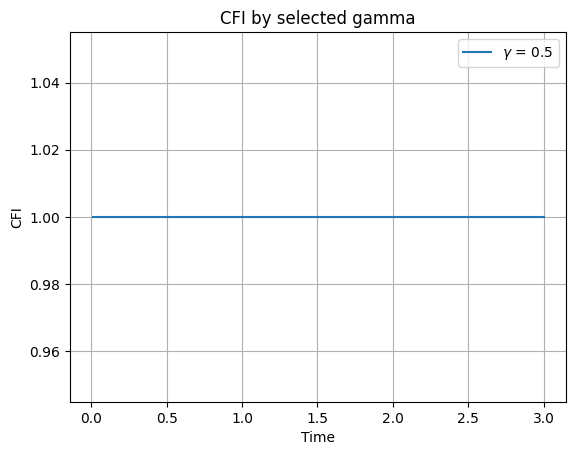

In [7]:
N = 1000
tau_CFI = np.linspace(0.01, 3.0, N, requires_grad = True)

CFI_numpy = np.zeros(N)

gamma = 5e-1

for i in range(len(tau_CFI)):
    CFI_numpy[i] = qml.qinfo.classical_fisher(circuit)(tau_CFI[i])
    CFI_numpy[i] = round((np.array(CFI_numpy[i], requires_grad = False)).numpy(), 10)
    
plt.subplot()
plt.plot(tau_CFI, CFI_numpy, label = f'$\gamma$ = {gamma}')

plt.title('CFI by selected gamma')
plt.xlabel('Time')
plt.ylabel('CFI')
plt.legend()
plt.grid()

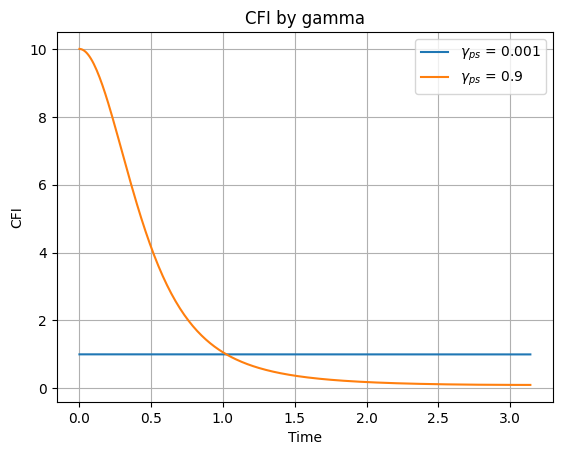

In [8]:
Tau_Sweep = np.arange(1e-3, np.pi * 1, 1e-2)
Data = np.zeros((2,len(Tau_Sweep)))

Gamma_control = 1e-3, 9e-1
for i in range(len(Tau_Sweep)):
    Gamma_global = Gamma_control[0]
    Data[0][i] = qml.qinfo.classical_fisher(circuit)(Tau_Sweep[i])
    Data[0][i] = round((np.array(Data[0][i], requires_grad = False)).numpy(), 10)
    
    Gamma_global = Gamma_control[1]
    Data[1][i] = qml.qinfo.classical_fisher(circuit)(Tau_Sweep[i])
    Data[1][i] = round((np.array(Data[1][i], requires_grad = False)).numpy(), 10)

plt.plot(Tau_Sweep, Data[0][:], label = f'$\gamma_{{ps}}$ = {Gamma_control[0]}')
plt.plot(Tau_Sweep, Data[1][:], label = f'$\gamma_{{ps}}$ = {Gamma_control[1]}')

plt.title('CFI by gamma')
plt.xlabel('Time')
plt.ylabel('CFI')
plt.legend()
plt.grid()

* What is CFI in quantum sensing method?

: Slope of the measurement signal correspods to change of the physical quantity